# CPA01 
## Tingwei Liu

### Data Overview
The dataset contains some customers who are withdrawing their account from the bank due to some loss and other issues. It consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. This dataset could be used to build model to predict bank user's action and prevent churning.


Data source: https://www.kaggle.com/sakshigoyal7/credit-card-customers

Interesting qeustion:
1. Is there any relationship between Education level and credit limit?
2. Does credict limit influnce customers churning?

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [66]:
df=pd.read_csv("BankChurners.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


### Rough overview

In [9]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### Print columns and index
We got 10127 users' data and 21 features

In [10]:
print(df.index.array)

<PandasArray>
[    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
 ...
 10117, 10118, 10119, 10120, 10121, 10122, 10123, 10124, 10125, 10126]
Length: 10127, dtype: int64


In [12]:
print(df.columns)
print(len(df.columns))

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')
21


### Simple plot
Plot Age Distribution and Credict Distribution

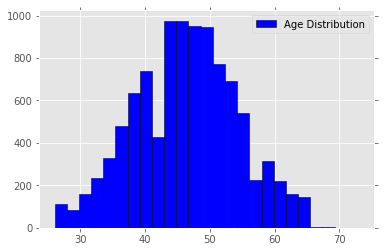

In [21]:
plt.figure()
plt.style.use('ggplot')
plt.hist(df['Customer_Age'], 
        bins = 25, 
        color = 'blue', 
        edgecolor = 'k', 
        label = 'Age Distribution' )

plt.tick_params(top='off', right='off')
plt.legend()
plt.show()

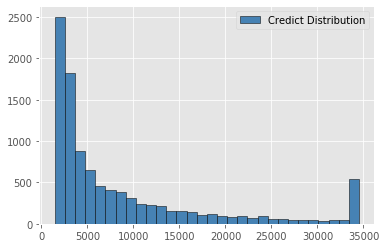

In [23]:
plt.style.use('ggplot')
plt.hist(df['Credit_Limit'], 
        bins = 30, 
        color = 'steelblue', 
        edgecolor = 'k', 
        label = 'Credict Distribution' )
plt.legend()
plt.show()


### Create a pivot table to show the relationship between credit limit and education level

In [45]:
df_edu=df.pivot_table(index=['CLIENTNUM'],columns=['Education_Level'],values='Credit_Limit')
df_edu

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
CLIENTNUM,,,,,,,
708082083,NaN,NaN,NaN,3544.0,NaN,NaN,NaN
708083283,NaN,NaN,NaN,NaN,NaN,NaN,3421.0
708084558,NaN,8258.0,NaN,NaN,NaN,NaN,NaN
708085458,NaN,NaN,NaN,NaN,NaN,1438.3,NaN
708086958,NaN,NaN,NaN,NaN,NaN,3128.0,NaN
...,...,...,...,...,...,...,...
828288333,NaN,NaN,NaN,NaN,NaN,3640.0,NaN
828291858,12050.0,NaN,NaN,NaN,NaN,NaN,NaN
828294933,NaN,NaN,NaN,2951.0,NaN,NaN,NaN


In [46]:
df_edu.describe()

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
count,1013.000000,451.000000,3128.000000,2013.000000,516.000000,1487.000000,1519.000000
mean,8684.536130,8413.258980,8566.100927,8605.823547,8862.560465,8899.509011,8491.798947
std,9307.846086,8998.520596,9030.543930,8975.182562,9324.047629,9228.373034,9028.635299
min,1438.300000,1438.300000,1438.300000,1438.300000,1438.300000,1438.300000,1438.300000
25%,2503.000000,2421.500000,2561.000000,2608.000000,2608.000000,2509.000000,2520.500000
50%,4489.000000,4480.000000,4607.500000,4546.000000,4473.000000,4654.000000,4411.000000
75%,10797.000000,10053.500000,10824.500000,10896.000000,11829.750000,11903.500000,10709.500000
max,34516.000000,34516.000000,34516.000000,34516.000000,34516.000000,34516.000000,34516.000000


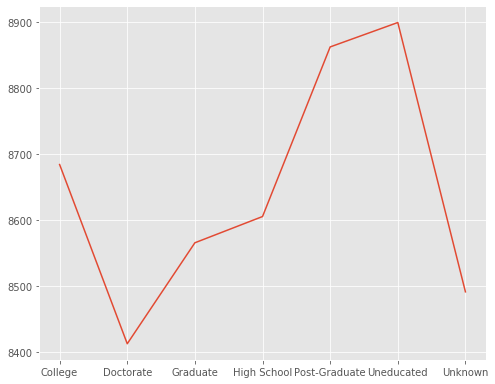

In [59]:
plt.figure(figsize=(8, 6.5))
plt.plot(df_edu.describe().loc['mean'])

### A pivot table show relationship between user churned and credit limit

In [48]:
df_ch=df.pivot_table(index=['CLIENTNUM'],columns=['Attrition_Flag'],values='Credit_Limit')
df_ch

Attrition_Flag,Attrited Customer,Existing Customer
CLIENTNUM,,
708082083,NaN,3544.0
708083283,3421.0,NaN
708084558,8258.0,NaN
708085458,NaN,1438.3
708086958,NaN,3128.0
...,...,...
828288333,NaN,3640.0
828291858,12050.0,NaN
828294933,2951.0,NaN


In [50]:
df_ch.describe()

Attrition_Flag,Attrited Customer,Existing Customer
count,1627.000000,8500.000000
mean,8136.039459,8726.877518
std,9095.334105,9084.969807
min,1438.300000,1438.300000
25%,2114.000000,2602.000000
50%,4178.000000,4643.500000
75%,9933.500000,11252.750000
max,34516.000000,34516.000000


In [54]:
df_ch.describe().loc['mean']

Attrition_Flag
Attrited Customer    8136.039459
Existing Customer    8726.877518
Name: mean, dtype: float64

### Use groupby feature
Use age and gender to group and show the mean value of total transaction amount and credit limit

In [81]:
df_group=df.groupby(['Customer_Age']).agg({"Credit_Limit":"mean"})
df_group

,Credit_Limit
Customer_Age,
26,4591.953846
27,5532.996875
28,8910.103448
29,7457.260714
30,6466.075714
31,8477.200000
32,8170.900943
33,7455.800000
34,7364.219863


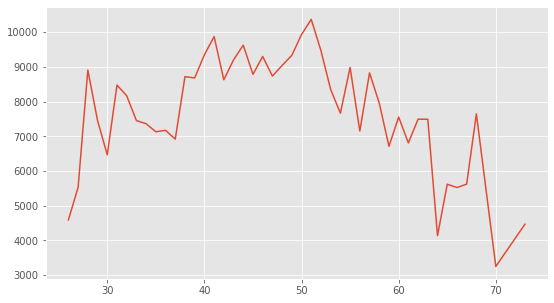

In [82]:
plt.figure(figsize=(9,5))
plt.plot(df_group)

## Dicussion
From the seveal data analysis below:  
We could not find a relation ship between the credit limit and the education level.  
We also can't find a linear relationship between user churning and credit limit.   
The age 50s got the highest average credict limit.  

  
I think we could use more complicate statistic model like support vector machine to do a classifiction and build a prediction model.

